Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, log_loss


Import Dataset

In [ ]:
df = pd.read_csv("Student_Performance.csv")
df.head()

,StudentID,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance
0,1001,7,99,Yes,9,1,Distinction
1,1002,4,82,No,4,2,Average
2,1003,8,51,Yes,7,2,Poor
3,1004,5,52,Yes,5,2,Poor
4,1005,7,75,No,8,5,Average


In [ ]:
df = df.drop('StudentID', axis=1)


In [ ]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [ ]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   StudentID                         10000 non-null  int64 
 1   Hours Studied                     10000 non-null  int64 
 2   Previous Scores                   10000 non-null  int64 
 3   Extracurricular Activities        10000 non-null  object
 4   Sleep Hours                       10000 non-null  int64 
 5   Sample Question Papers Practiced  10000 non-null  int64 
 6   Performance                       10000 non-null  object
dtypes: int64(5), object(2)
memory usage: 547.0+ KB


In [ ]:
student.describe()

,StudentID,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6000.50000,4.992900,69.445700,6.530600,4.583300
std,2886.89568,2.589309,17.343152,1.695863,2.867348
min,1001.00000,1.000000,40.000000,4.000000,0.000000
25%,3500.75000,3.000000,54.000000,5.000000,2.000000
50%,6000.50000,5.000000,69.000000,7.000000,5.000000
75%,8500.25000,7.000000,85.000000,8.000000,7.000000
max,11000.00000,9.000000,99.000000,9.000000,9.000000


In [ ]:
student.columns

Index(['StudentID', 'Hours Studied', 'Previous Scores',
       'Extracurricular Activities', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance'],
      dtype='object')

Encoding

In [ ]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
performance_mapping = {'Poor': 0, 'Average': 1, 'Good': 2, 'Distinction': 3}
df['Performance'] = df['Performance'].map(performance_mapping)

Feature Extraction

In [ ]:
X = df.drop('Performance', axis=1)
y = df['Performance']

Train , Validation and Test Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

Chuẩn hóa

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [2]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [2]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Find K

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Đánh giá

In [ ]:
y_pred = knn.predict(X_test_scaled)

Prediction


In [ ]:
from sklearn.metrics import r2_score

print("\n🎯 Độ chính xác:", accuracy_score(y_test, y_pred))
print("\n📋 Báo cáo phân loại:\n", classification_report(y_test, y_pred))


🎯 Độ chính xác: 0.8963333333333333

📋 Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1227
           1       0.89      0.86      0.88       977
           2       0.82      0.88      0.85       605
           3       0.86      0.72      0.78       191

    accuracy                           0.90      3000
   macro avg       0.88      0.85      0.87      3000
weighted avg       0.90      0.90      0.90      3000



In [ ]:
reverse_performance_mapping = {v: k for k, v in performance_mapping.items()}
y_test_labels = y_test.map(reverse_performance_mapping)
y_pred_labels = pd.Series(y_pred).map(reverse_performance_mapping)

print(f"Giá trị K : {k}")
print("\nĐộ chính xác (Accuracy):")
print(accuracy_score(y_test_labels, y_pred_labels))
print("\nBáo cáo phân loại:")
print(classification_report(y_test_labels, y_pred_labels))

Giá trị K : 5

Độ chính xác (Accuracy):
0.8963333333333333

Báo cáo phân loại:
              precision    recall  f1-score   support

     Average       0.89      0.86      0.88       977
 Distinction       0.86      0.72      0.78       191
        Good       0.82      0.88      0.85       605
        Poor       0.94      0.96      0.95      1227

    accuracy                           0.90      3000
   macro avg       0.88      0.85      0.87      3000
weighted avg       0.90      0.90      0.90      3000



Ma trận nhầm lẫn

In [ ]:
class_labels = ['Poor', 'Average', 'Good', 'Distinction']
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=class_labels)

cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)




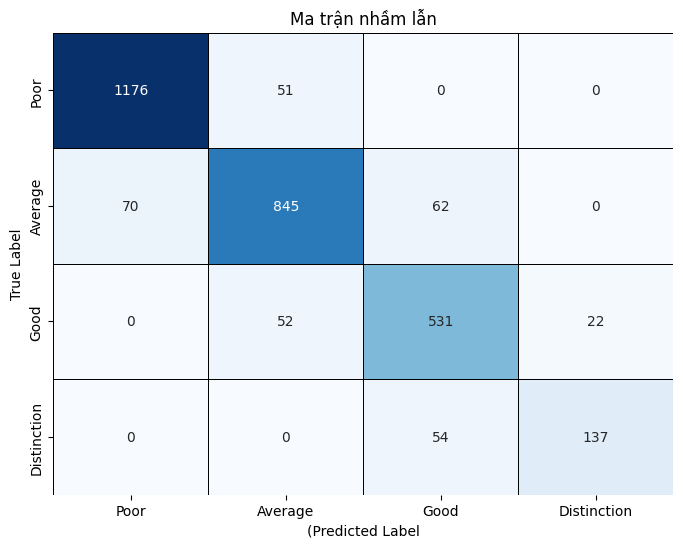

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues',
            linewidths=0.5, linecolor='black', cbar=False)
plt.title('Ma trận nhầm lẫn')
plt.ylabel('True Label')
plt.xlabel('(Predicted Label')
plt.show()

In [ ]:
Hàm mất mát

In [ ]:
y_pred_proba = knn.predict_proba(X_test_scaled)

logloss = log_loss(y_test, y_pred_proba, labels=y.unique())



In [ ]:
print(f"Hàm mất mát Log Loss (Log Loss Function): {logloss:.4f}\n")

Hàm mất mát Log Loss (Log Loss Function): 0.6708



Cải thiện mô hình

In [ ]:
k = 5
knn_weighted = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn_weighted.fit(X_train_scaled, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
reverse_performance_mapping = {v: k for k, v in performance_mapping.items()}
y_test_labels = y_test.map(reverse_performance_mapping)
y_pred_labels = pd.Series(y_pred).map(reverse_performance_mapping)

print(f"Giá trị K : {k}")
print("\nĐộ chính xác (Accuracy):")
print(accuracy_score(y_test_labels, y_pred_labels))
print("\nBáo cáo phân loại:")
print(classification_report(y_test_labels, y_pred_labels))

Giá trị K : 5

Độ chính xác (Accuracy):
0.8963333333333333

Báo cáo phân loại:
              precision    recall  f1-score   support

     Average       0.89      0.86      0.88       977
 Distinction       0.86      0.72      0.78       191
        Good       0.82      0.88      0.85       605
        Poor       0.94      0.96      0.95      1227

    accuracy                           0.90      3000
   macro avg       0.88      0.85      0.87      3000
weighted avg       0.90      0.90      0.90      3000



In [ ]:
class_labels = ['Poor', 'Average', 'Good', 'Distinction']
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=class_labels)

cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)


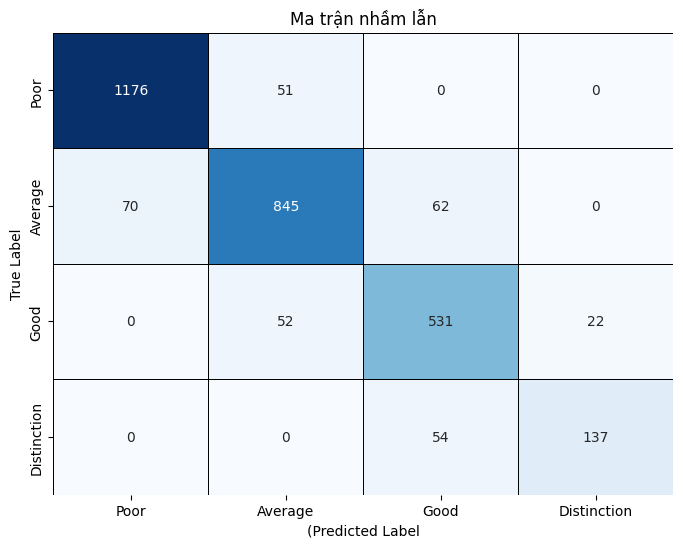

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues',
            linewidths=0.5, linecolor='black', cbar=False)
plt.title('Ma trận nhầm lẫn')
plt.ylabel('True Label')
plt.xlabel('(Predicted Label')
plt.show()